**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [1]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [4]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 9s 155us/step - loss: 0.2715 - acc: 0.9155 - val_loss: 0.1073 - val_acc: 0.9690
Epoch 2/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0936 - acc: 0.9705 - val_loss: 0.0950 - val_acc: 0.9707
Epoch 3/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0579 - acc: 0.9818 - val_loss: 0.0895 - val_acc: 0.9738
Epoch 4/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0406 - acc: 0.9871 - val_loss: 0.0691 - val_acc: 0.9806
Epoch 5/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0289 - acc: 0.9908 - val_loss: 0.0881 - val_acc: 0.9748
Epoch 6/10
60000/60000 [==============================] - 1s 16us/step - loss: 0.0219 - acc: 0.9929 - val_loss: 0.0769 - val_acc: 0.9809
Epoch 7/10
60000/60000 [=


# Plotting

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None
10000/10000 [==============================] - 0s 36us/step
LOSS: 0.08533150020160488
ACCURACY: 0.9832


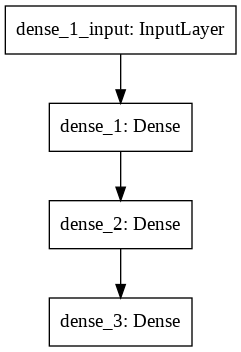

In [11]:

print(model.summary())
loss, accuracy = model.evaluate(test_data, test_labels_one_hot)
print("LOSS: {}".format(loss))
print("ACCURACY: {}".format(accuracy))

from keras.utils import plot_model
plot_model(model, to_file='model.png')


# plot acc and loss

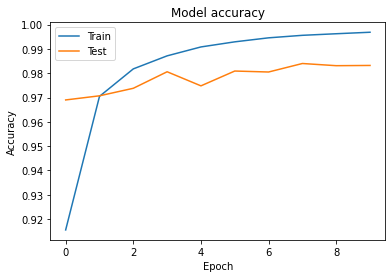

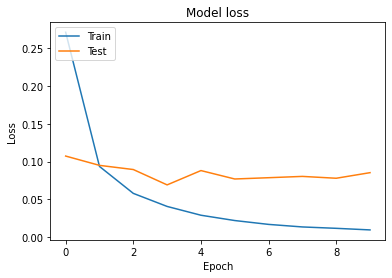

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Modifying the model properties 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.4013 - acc: 0.8768 - val_loss: 0.2048 - val_acc: 0.9358
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.1518 - acc: 0.9527 - val_loss: 0.1175 - val_acc: 0.9652
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0976 - acc: 0.9699 - val_loss: 0.0990 - val_acc: 0.9693
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0686 - acc: 0.9783 - val_loss: 0.1290 - val_acc: 0.9593
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0481 - acc: 0.9843 - val_loss: 0.0821 - val_acc: 0.9733
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0359 - acc: 0.9885 - val_loss: 0.0796 - val_acc: 0.9759
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0265 - acc: 0.9917 - val_loss: 0.0841 - val_acc

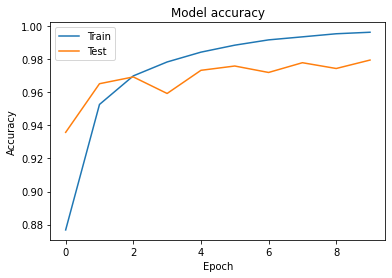

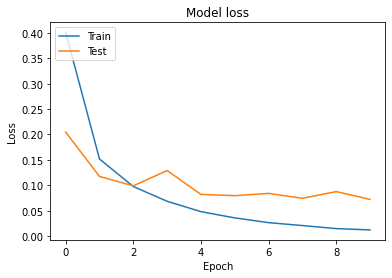

In [13]:
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(512, activation='tanh'))
model.add(Dense(512, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
print(model.summary())
loss, accuracy = model.evaluate(test_data, test_labels_one_hot)
print("LOSS: {}".format(loss))
print("ACCURACY: {}".format(accuracy))

from keras.utils import plot_model
plot_model(model, to_file='model.png')

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()